In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
filepath = 'cancer_pred.csv'
data = pd.read_csv(filepath)

In [5]:
print(data)

          ID  Clump  UnifSize  UnifShape  ...  BlandChrom  NormNucl Mit  Class
0    1000025      5         1          1  ...           3         1   1      2
1    1002945      5         4          4  ...           3         2   1      2
2    1015425      3         1          1  ...           3         1   1      2
3    1016277      6         8          8  ...           3         7   1      2
4    1017023      4         1          1  ...           3         1   1      2
..       ...    ...       ...        ...  ...         ...       ...  ..    ...
694   776715      3         1          1  ...           1         1   1      2
695   841769      2         1          1  ...           1         1   1      2
696   888820      5        10         10  ...           8        10   2      4
697   897471      4         8          6  ...          10         6   1      4
698   897471      4         8          8  ...          10         4   1      4

[699 rows x 11 columns]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
### DATA CLEANING ###
print(data.isnull().sum())

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64


In [9]:
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [10]:
#Giving 'non-numeric' names to the final classes only because it would be easier to interpret
new_class ={2:'benign', 4:'malignant'}
data['Class'] = data['Class'].map(new_class)
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [11]:
### EDA ### 

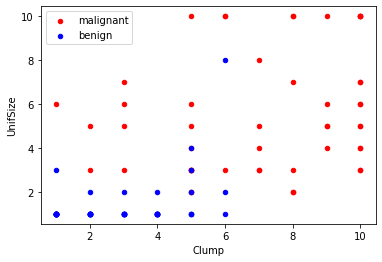

In [12]:
ax = data[data['Class'] == 'malignant'][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='r', label='malignant');
data[data['Class'] == 'benign'][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='b', label='benign',ax=ax);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


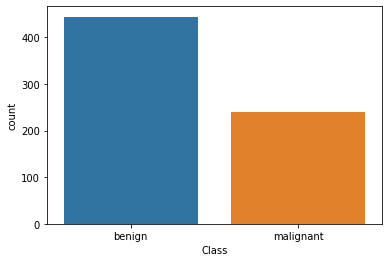

In [13]:
#Showing a countplot to analyze number of benign and malignant cases
sns.countplot(data['Class'],label="Count")
plt.show()


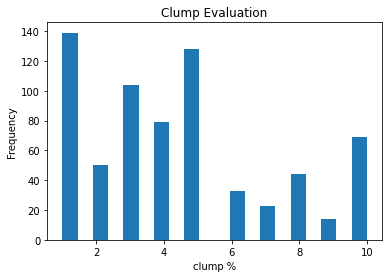

In [14]:
ax = plt.axes()
ax.hist(data.Clump, bins=20);
ax.set(xlabel='clump %',  ylabel='Frequency', title='Clump Evaluation');
plt.show()

In [15]:
### MODEL TRAINING AND TESTING ###

In [16]:
Y = data['Class']
X = data[['Clump', 'UnifSize','UnifShape','MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=1)
print ('Train set shapes (x & y):', X_train.shape,  y_train.shape)
print ('Test set shapes (x & y):', X_test.shape,  y_test.shape)


Train set shapes (x & y): (478, 9) (478,)
Test set shapes (x & y): (205, 9) (205,)


In [17]:
#Using SVM algorithm (Support Vector Machine)
#SVM basically seperates out values of two classes by creating a hyperplane between them
svm_mod = svm.SVC(kernel = 'linear', random_state = 1)
svm_mod.fit(X_train, y_train) #Fitting the model

SVC(kernel='linear', random_state=1)

In [18]:
y_pred = svm_mod.predict(X_test) #Predicting the result
print(y_pred[0:5])

['benign' 'benign' 'benign' 'malignant' 'benign']


In [19]:
#Getting a score of 0.962 
sco = f1_score(y_test, y_pred, average='weighted') 
print("\nSCORE: ", sco)
acc = accuracy_score(y_test, y_pred) 
print("\nACCURACY: ", acc)


SCORE:  0.9609756097560975

ACCURACY:  0.9609756097560975


In [20]:
### ANALYZING RESULT THROUGH CONFUSION MATRIX ###

In [21]:
#creating a confusion matrix to analyze the result in the test set
#After analyzing we can say that 
# 129 cases are true positive (Truly Benign)
# 4 cases are false positive (Wrongly predicted as Benign when it's malignant)
# 4 cases are false negative (Wrongly predicted as Malignant when it's benign)
# 68 cases are true negative (Truly Malignant)
con_mat = np.array(confusion_matrix(y_test,y_pred))
conf_matrix = pd.DataFrame( con_mat, index=['is Benign', 'is Malignant'], columns =['predicted Benign', 'predicted Malignant'] )
print("\n Confusion Matrix :\n", conf_matrix)



 Confusion Matrix :
               predicted Benign  predicted Malignant
is Benign                  129                    4
is Malignant                 4                   68


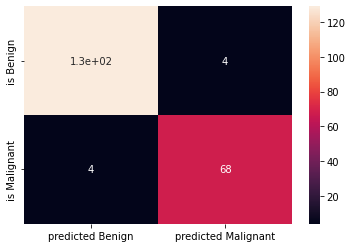

In [22]:
#Creating a plot (heatmap) to visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True)
plt.show()


In [23]:
#Feeding in actual values for different features to predict the type (benign or malignant)
y_pred = svm_mod.predict([[4, 1, 2, 2, 5, 4, 6, 2, 1]])
print("\nThe predicted type for the input is : ", y_pred)


The predicted type for the input is :  ['benign']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
